# ** Zomato data EDA and Restaurant Ratings prediction model**

# **ABSTRACT**

Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over india.These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is. 

We will therefore use the real time Data set with variuos features a user would look into regarding a restaurant. We will be considering Banglore City in this analysis.

Content
The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment
of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.

 The kind of analysis can be done using the data, by studying the factors such as

    • Location of the restaurant
    • Approx Price of food
    • Theme based restaurant or not
    • Which locality of that city serves that cuisines with maximum number of restaurants
    • The needs of people who are striving to get the best cuisine of the neighborhood
    • Is a particular neighborhood famous for its own kind of food.



            Source: Kaggle

**Main Objective:**

The main agenda of this project is:

>> Perform extensive **Exploratory Data Analysis(EDA)** on the Zomato Dataset.

>>Build an appropriate **Machine Learning Model** that will help various Zomato Restaurants to predict their respective Ratings based on certain features

In [113]:

#IMPORT THE NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**LOAD DATASET**

In [114]:

data = pd.read_csv(r"C:\Users\nishc\OneDrive\Desktop\zomato.csv")

In [115]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Columns description

1. <b>url </B> contains the url of the restaurant in the zomato website

2. **address** contains the address of the restaurant in Bengaluru

3. **name** contains the name of the restaurant

4. **online_order** whether online ordering is available in the restaurant or not

5. **book_table** table book option available or not

6. **rate** contains the overall rating of the restaurant out of 5

7. **votes** contains total number of rating for the restaurant as of the above mentioned date

8. **phone** contains the phone number of the restaurant

9. **location** contains the neighborhood in which the restaurant is located

10. **rest_type** restaurant type

11. **dish_liked** dishes people liked in the restaurant

12. **cuisines** food styles, separated by comma

13. **approx_cost**(for two people) contains the approximate cost of meal for two people

14. **reviews_list** list of tuples containing reviews for the restaurant, each tuple

15. **menu_item** contains list of menus available in the restaurant

16. **listed_in**(type) type of meal

17. **listed_in**(**city**) contains the neighborhood in which the restaurant is listed

In [116]:
data.shape

(51717, 17)

In [117]:
data.dtypes #checking the data types

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [118]:
data.isna().sum() #Checking null values

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [119]:
#Deleting Unnnecessary Columns
df=data.drop(['url','phone'],axis=1) #Dropping the column like "phone" and "url" and saving the new dataset as "df"

**Checking for duplicate values**

In [120]:
df.duplicated().sum() 

43

In [121]:
df.drop_duplicates(inplace=True)

In [122]:
df.duplicated().sum()

0

**Drop null values**

In [123]:
#Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

**Renaming columes appropriately**

In [14]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [124]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [125]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Cleaning the dataset**

In [126]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

**replacing the "," with nothing and converting the results to float**

In [127]:
#zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
df['cost'] = df['cost'].astype(float)

In [128]:
print(df['cost'].unique())

print('---'*10)

df.dtypes

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]
------------------------------


address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [129]:
#Reading uninque values from the Rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [130]:
df = df.loc[df.rate !='NEW'] #getting rid of "NEW"

In [131]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

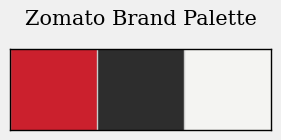

In [132]:
#Removing '/5' from Rates

df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))


# Define the color palette
palette = ['#cb202d', '#2d2d2d','#f4f4f2']

# Plot the color palette using Seaborn
sns.palplot(palette)
ax = plt.gca()

# Set the border color and width
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)


# Set the title of the plot
plt.title("Zomato Brand Palette", loc='center', fontfamily='serif', fontsize=15, y=1.2)

# Show the plot
plt.show()

<br>
<h1>Visualisations</h1>

<br>
<h3>Number of restaurants based on type</h2>

In [133]:
count= df.rest_type.value_counts()[0:20].sort_values()
count

rest_type
Beverage Shop                  137
Beverage Shop, Quick Bites     137
Dessert Parlor, Cafe           143
Cafe, Casual Dining            159
Bakery                         166
Food Court                     220
Pub, Casual Dining             224
Lounge                         298
Casual Dining, Cafe            304
Fine Dining                    311
Pub                            324
Bar, Casual Dining             336
Takeaway, Delivery             342
Bar                            358
Delivery                       704
Casual Dining, Bar             985
Dessert Parlor                1083
Cafe                          2375
Quick Bites                   5250
Casual Dining                 7326
Name: count, dtype: int64

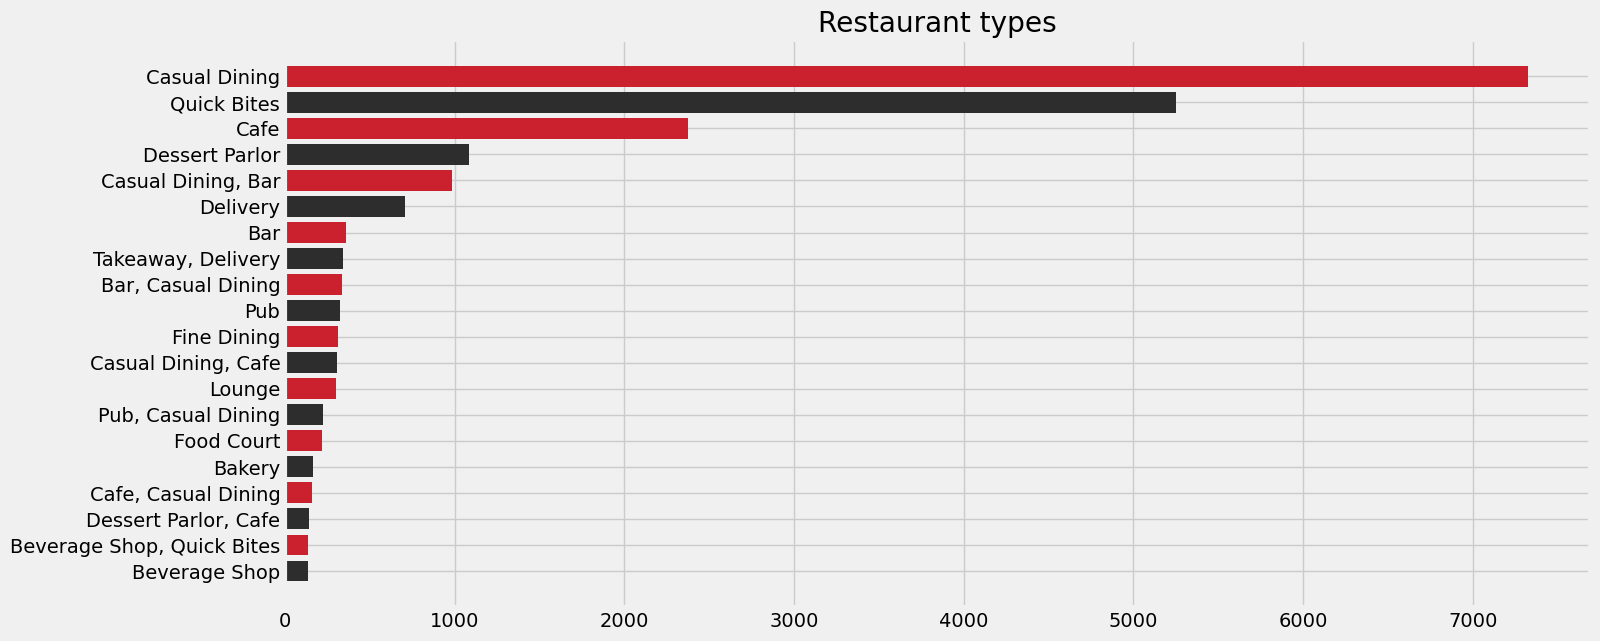

In [134]:
plt.figure(figsize=(15,7))
plt.barh(count.index,count,color = ['#2d2d2d','#cb202d'])
plt.title('Restaurant types')
plt.show()

**Casual Dining**, **Quick Bites** and **Cafe** are the 3 most common types of Restaurants in Banglore

<br>
<h3>Most famous restaurants chains in Bangaluru</h3>

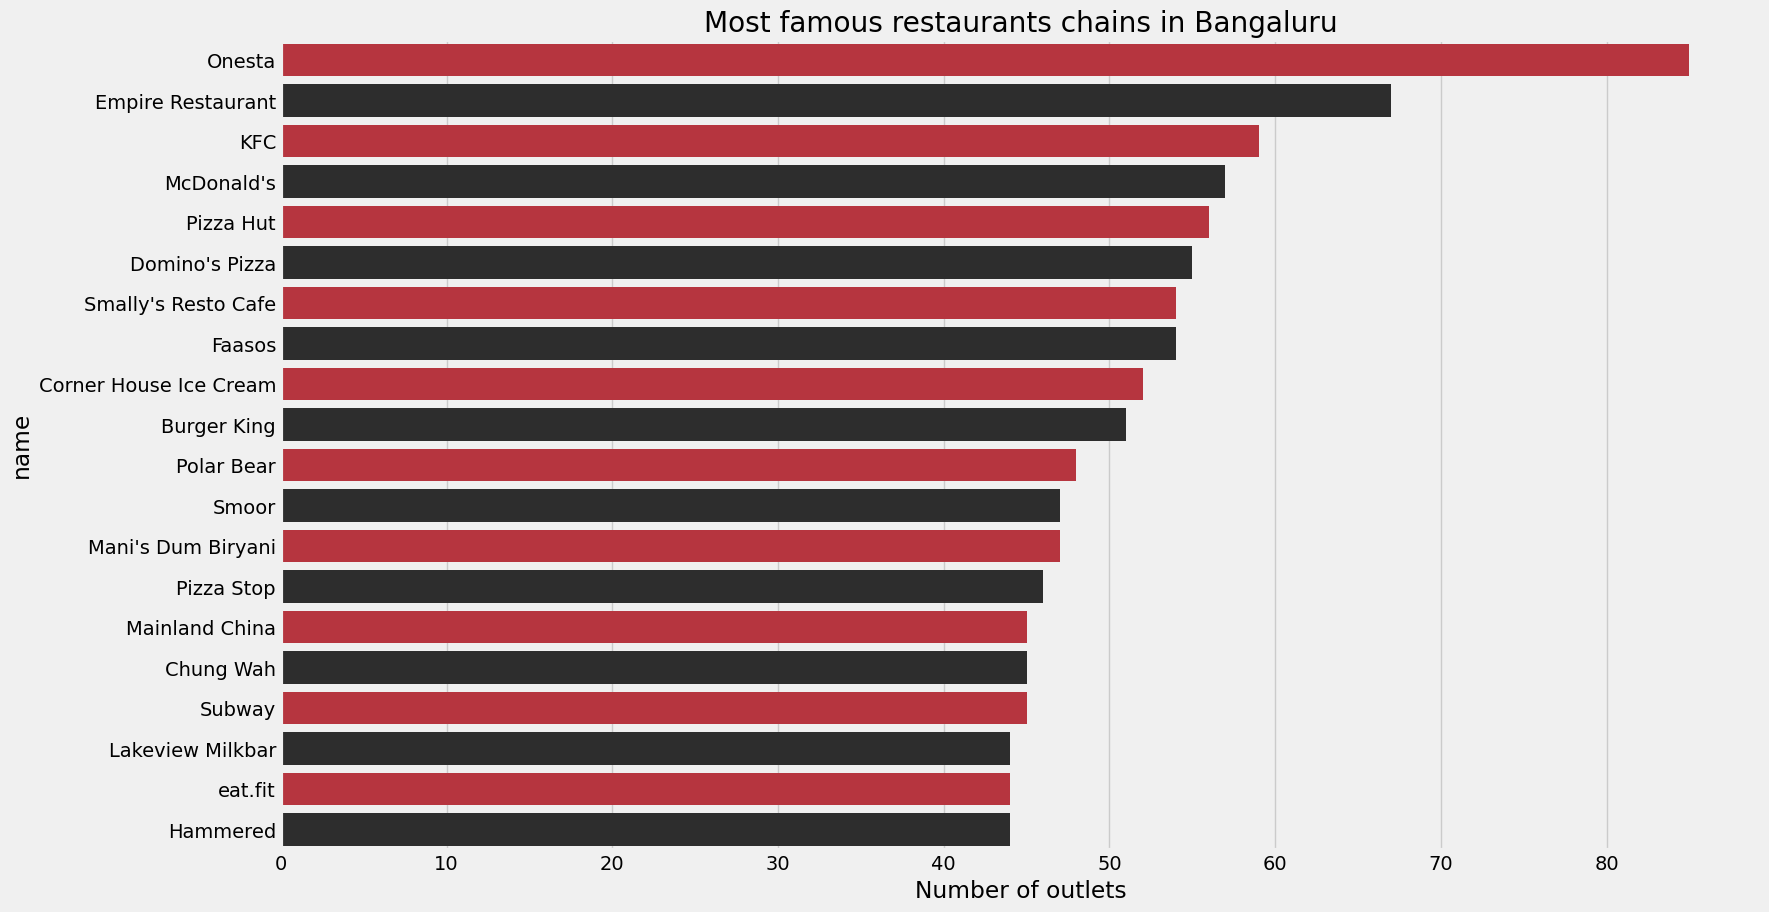

In [135]:
plt.figure(figsize=(17,10))
chains=df.name.value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette=['#cb202d', '#2d2d2d'])
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

<br>

<h3>Whether restaurant offer Table booking or not</h3>

In [136]:
x=df['book_table'].value_counts()
x

book_table
No     17191
Yes     6057
Name: count, dtype: int64

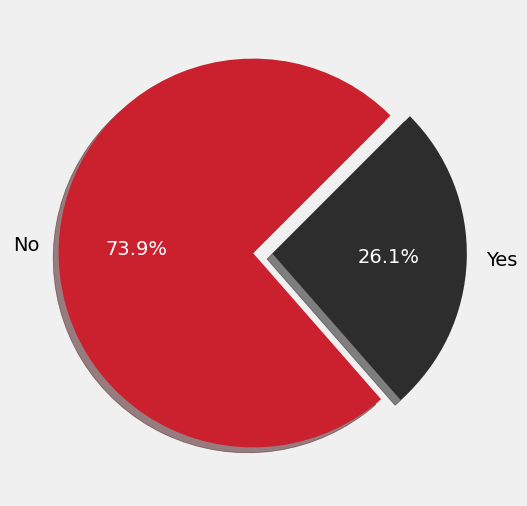

In [137]:
x=df['book_table'].value_counts()
plt.figure(figsize=(12,6))
explode_values= [0,0.1]
chart,texts,autotexts=plt.pie(x,labels=x.index,colors=['#cb202d', '#2d2d2d'],autopct='%0.1f%%',startangle=45,explode=explode_values,shadow=True)
for autotext in autotexts:
    autotext.set_color('white')
plt.show()

**Insight**

Most of the Restaurants do not offer table booking

<br>
<br>

<h3>Whether Restaurants deliver online or Not</h3>

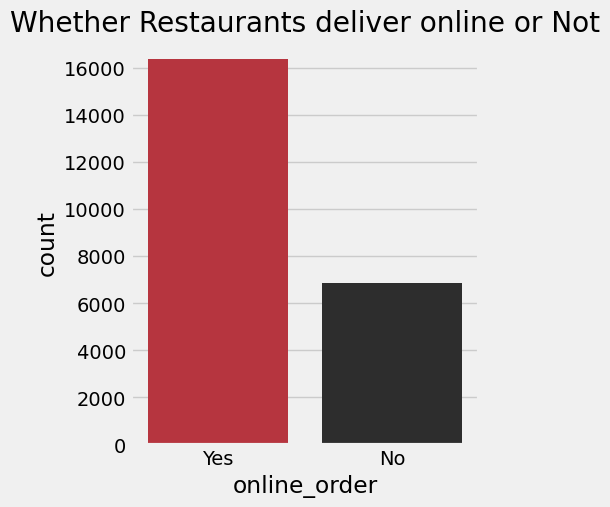

In [138]:
#Restaurants delivering Online or not
sns.countplot(x=df['online_order'],palette=['#cb202d', '#2d2d2d'])
fig = plt.gcf()
fig.set_size_inches(4,5)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

**Insight:**

Most Restaurants offer option for online order and delivery


<br>

<br>

## **Rating Distributions**

<Axes: xlabel='rate', ylabel='Density'>

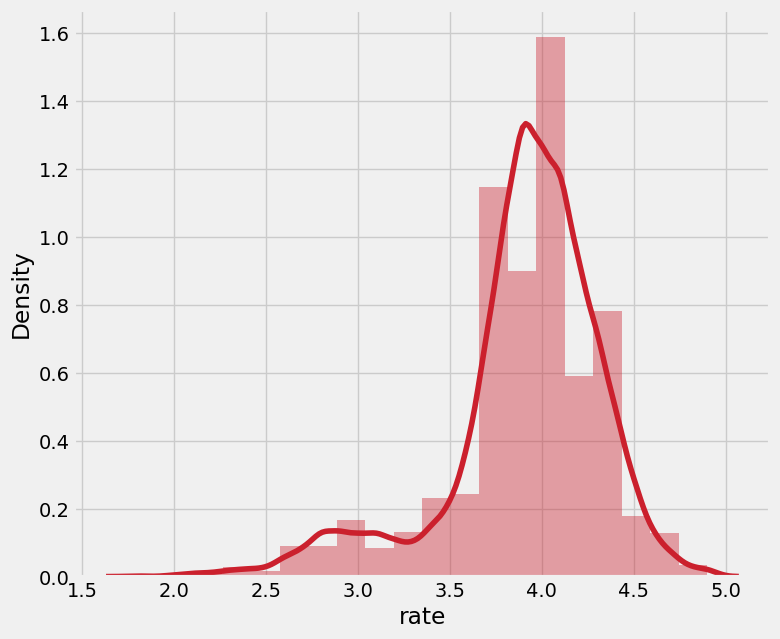

In [139]:
#How ratings are distributed
plt.figure(figsize=(8,7))


sns.distplot(df['rate'],bins=20,color='#cb202d')



*  **Insight**

  We can infer from above that most of the ratings are within 3.5 and 4.5



<br>
<h3>Cost vs rating parallel with online order.</h3>

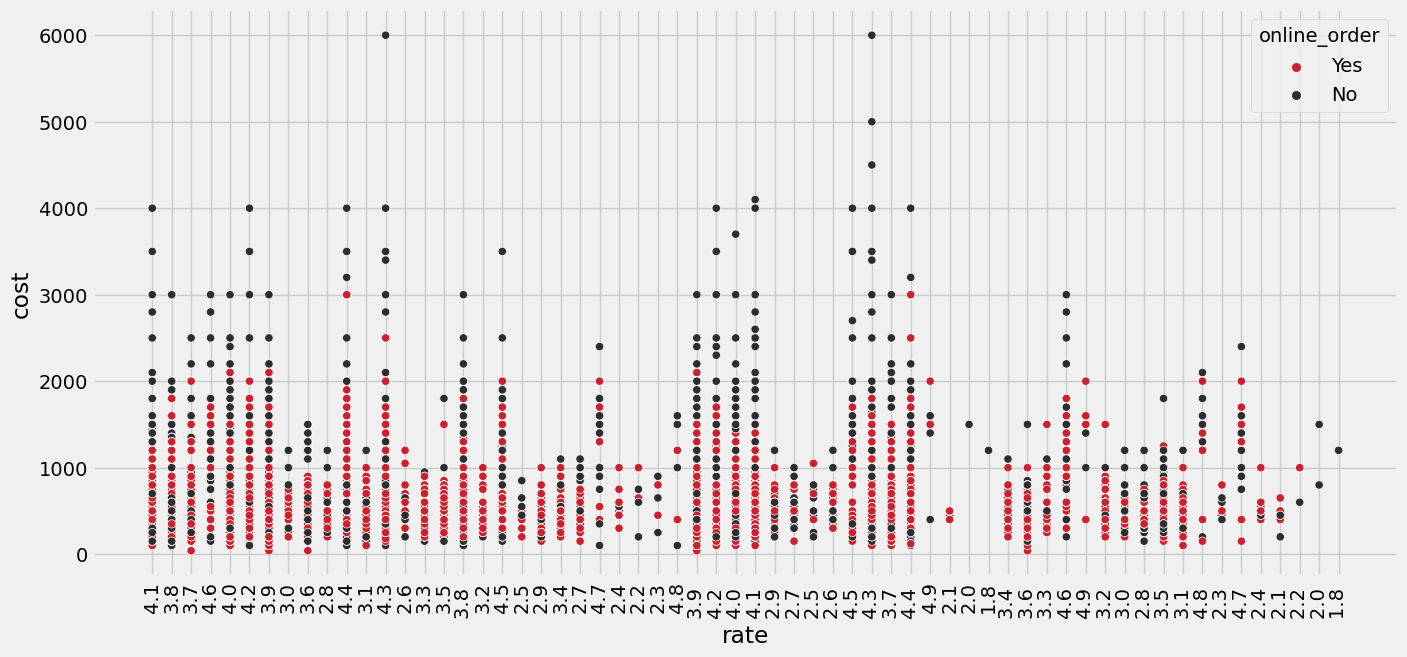

In [140]:
# #Distribution of the cost Vs ratings in parallel with online order
plt.figure(figsize=(15,7))
sns.scatterplot(x=df.rate,y=df.cost,hue=df.online_order,palette=['#cb202d', '#2d2d2d'])
plt.xticks(rotation=90)
plt.show()

**Count of ratings as between "1 and 2", "2 and 3", "3 and 4", and "4 and 5"** 

In [141]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [142]:
df['rate'].min()

'1.8'

In [143]:
df['rate'].max()

'4.9 '

In [144]:
df['rate']=df['rate'].astype(float)

In [145]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [146]:
((df['rate']>=2) & (df['rate']<3)).sum()

1179

In [147]:
((df['rate']>=3) & (df['rate']<4)).sum()

10153

In [148]:
(df['rate']>=4).sum()

11911

<br>

**Plotting the counts with the help of pie chart**

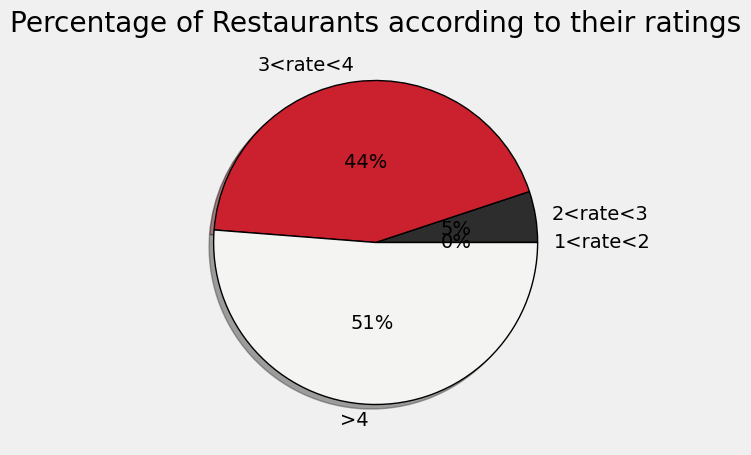

In [149]:
# Data for the pie chart
slices = [
    ((df['rate'] >= 1) & (df['rate'] < 2)).sum(),
    ((df['rate'] >= 2) & (df['rate'] < 3)).sum(),
    ((df['rate'] >= 3) & (df['rate'] < 4)).sum(),
    (df['rate'] >= 4).sum()
]

labels = ['1<rate<2', '2<rate<3', '3<rate<4', '>4']
colors = ['#f4f4f2', '#2d2d2d', '#cb202d']

# Plot the pie chart
plt.pie(
    slices,
    colors=colors,
    labels=labels,
    autopct='%1.0f%%',
    pctdistance=0.5,
    labeldistance=1.1,
    shadow=True,
    wedgeprops=dict(edgecolor='black', linewidth=1)  # Add black border to slices
)

# Set figure size and title
fig = plt.gcf()
fig.set_size_inches(6, 5)
plt.title("Percentage of Restaurants according to their ratings")

# Show the plot
plt.show()

## **Services Types**

Text(0.5, 1.0, 'Type of Service')

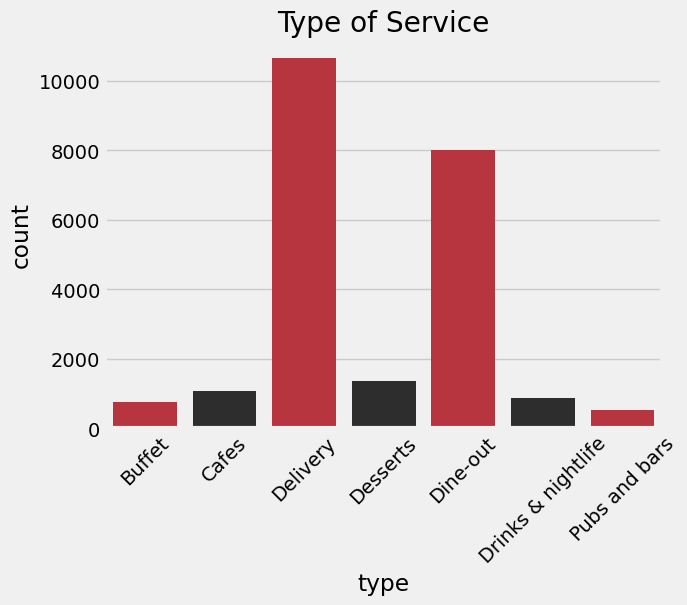

In [150]:
#Types of Services

sns.countplot(x=df['type'],palette=['#cb202d', '#2d2d2d'])
plt.xticks(rotation=45)

fig.set_size_inches(13,13)
plt.title('Type of Service')

Here the two main service types are **Delivery** and **Dine-out**

<br>
<br>

## **Distribution of Cost of Food for two People**

In [151]:
from plotly.offline import iplot

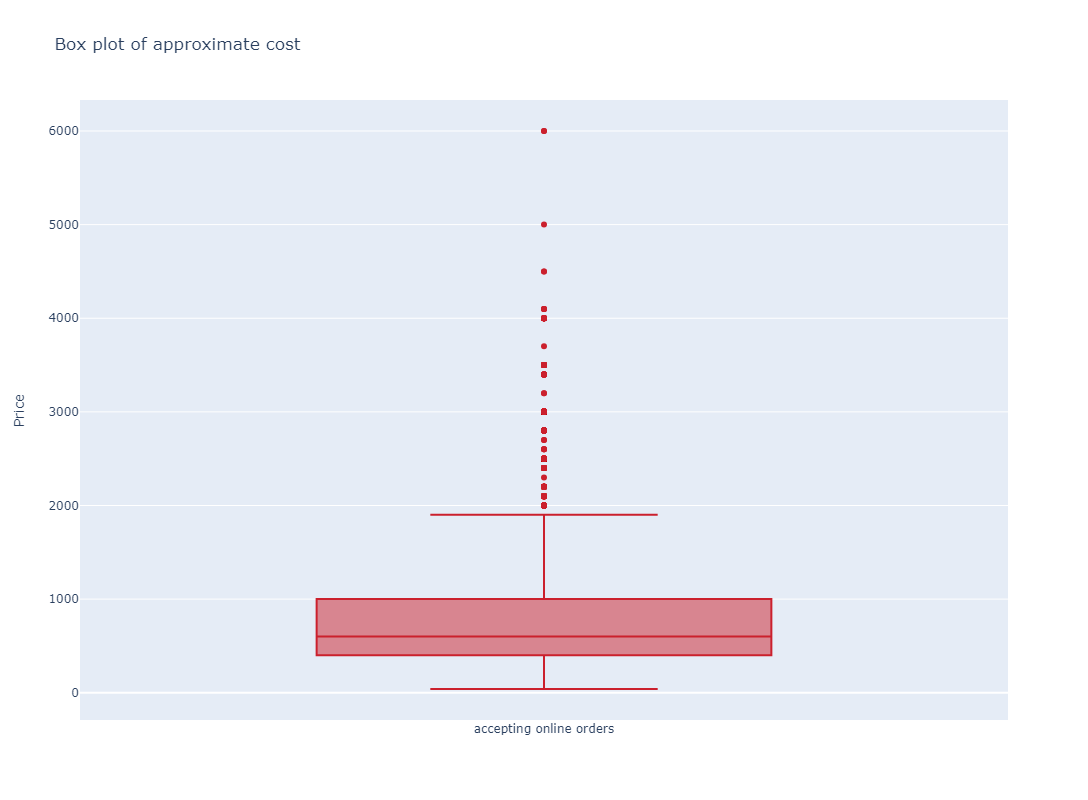

In [152]:
trace0=go.Box(y=df['cost'],name="accepting online orders",
              marker = dict(
        color = 'rgb(203, 32, 45)',
    ))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=800,height=800,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

**Distribution of charges**

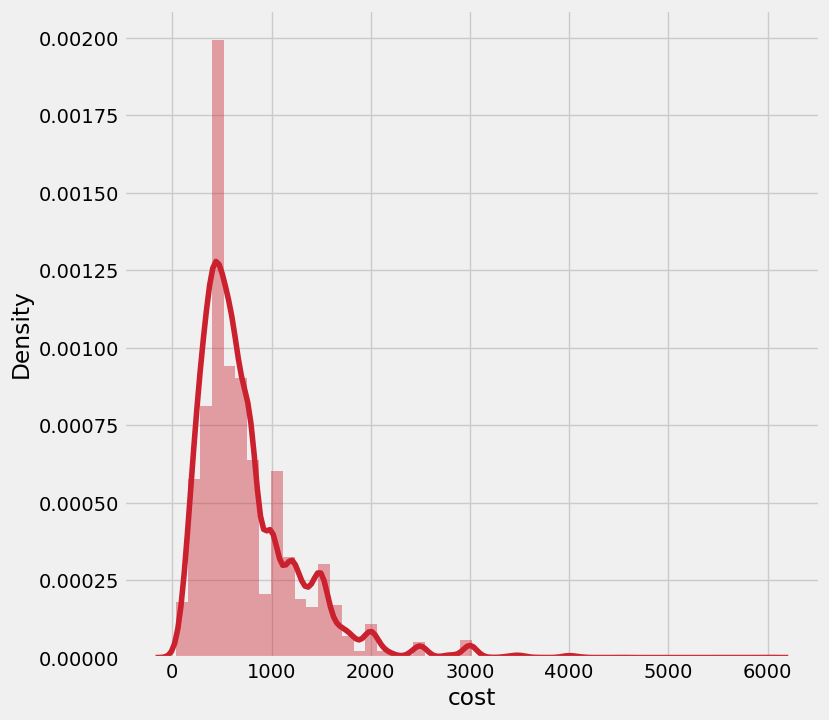

In [153]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'],color='#cb202d')
plt.show()

## **Most Liked Dishes**

In [154]:
#re=regular expression (use for splitting words)

import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [155]:
df.index=range(df.shape[0])

In [156]:
df.index

RangeIndex(start=0, stop=23248, step=1)

In [157]:
print("Count of Most liked dishes in Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

Count of Most liked dishes in Bangalore


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
Name: count, dtype: int64

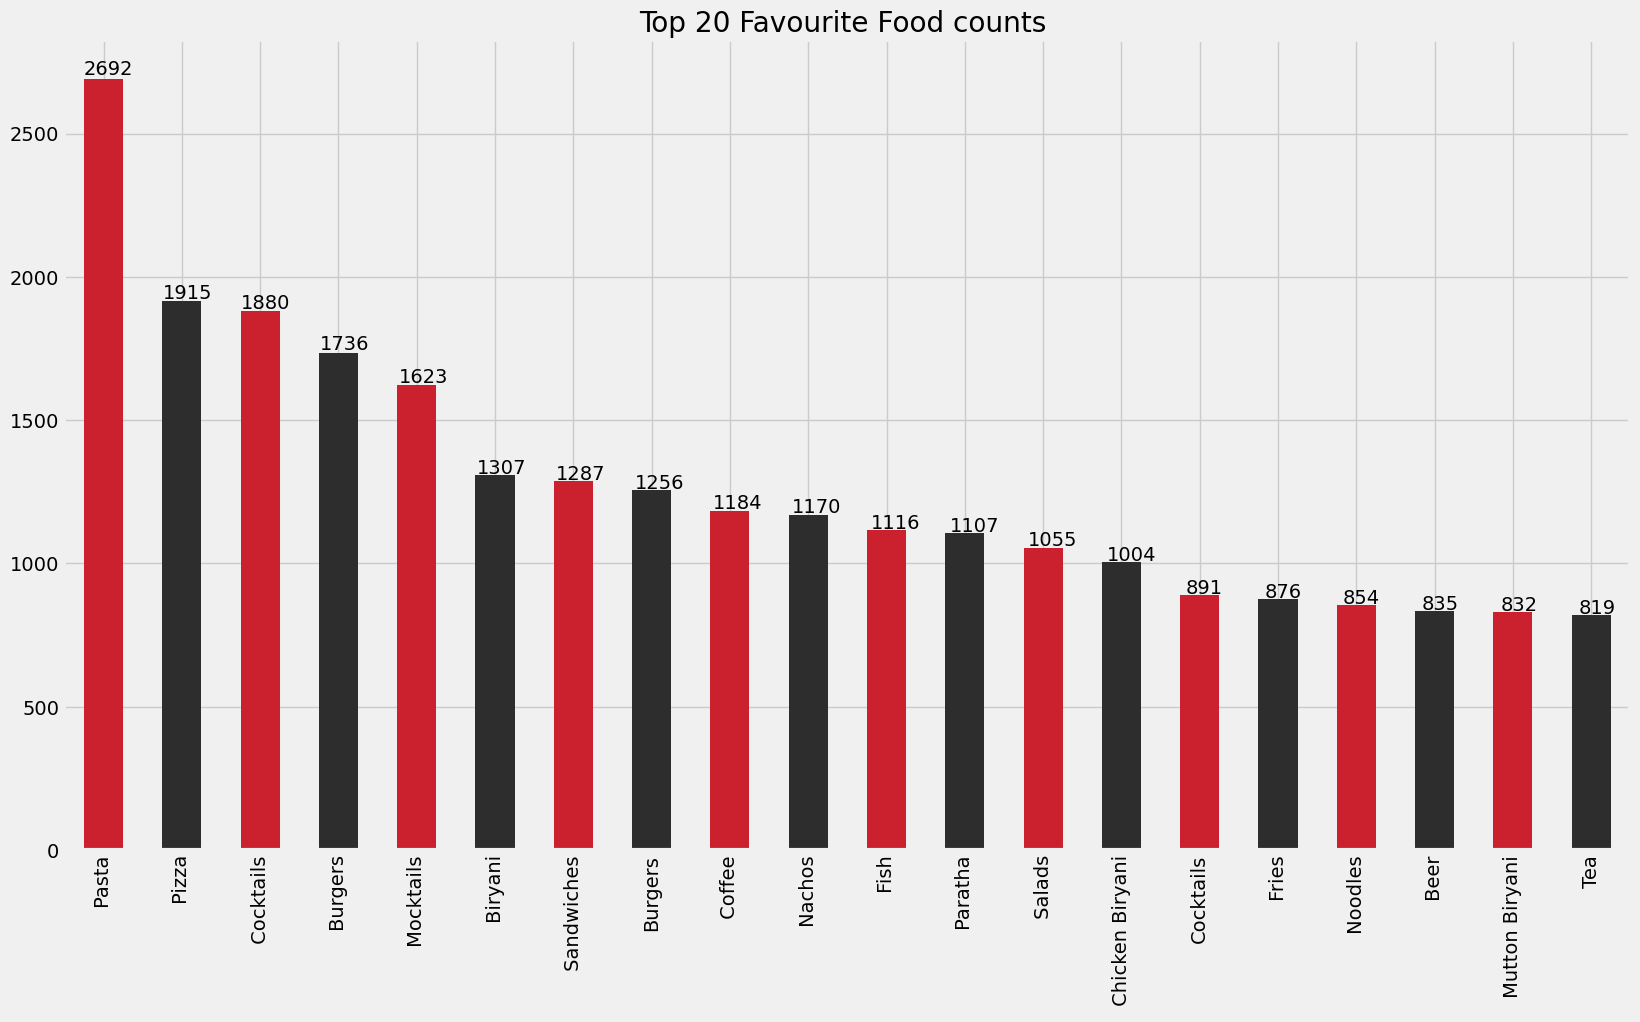

In [158]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(18,10),title = 'Top 20 Favourite Food counts ',color=('#cb202d','#2d2d2d'))

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

We can infer from the analysis that the 5 most liked dishes are **Pasta**,**Pizza**,**Cocktails**,**Burgers**,and **Mocktails**

# **Building Our Model**

In [159]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## **Convert the online categorical variables into a numeric format**

In [160]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

In [161]:
df.online_order.value_counts()

online_order
1    16378
0     6870
Name: count, dtype: int64

In [162]:
df.online_order = pd.to_numeric(df.online_order)


**change the string categorical into to a categorical int**
---



In [163]:
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

In [164]:
df.book_table = pd.to_numeric(df.book_table)

In [165]:
df.book_table.value_counts()

book_table
0    17191
1     6057
Name: count, dtype: int64

<h3>Label encode the categorical variables to make it easier to build algorithm</h3>

In [166]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [167]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [169]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [170]:
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df.csv') 

In [171]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [172]:
y = df['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)


<br>
<br>

## **Linear Regression**

In [174]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [179]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Make predictions
y_pred = lr_model.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # R-squared Score


# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R^2): {r2}")




Mean Squared Error (MSE): 0.1408474985301535
R-squared Score (R^2): 0.2281882852296676


<br>
<br>

## **Random Forest**

In [112]:
#from sklearn.tree import DecisionTreeRegressor

In [178]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create and train the Random Forest Regressor
RF_Model = RandomForestRegressor(n_estimators=1000, random_state=245, min_samples_leaf=1)
RF_Model.fit(x_train, y_train)

# Make predictions
y_predict = RF_Model.predict(x_test)

# Calculate metrics
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

# Print metrics
print(f"R-squared Score (R^2): {r2}")
print(f"Mean Squared Error (MSE): {mse}")



R-squared Score (R^2): 0.9091559464955606
Mean Squared Error (MSE): 0.01657808173622651


<br>
<br>

## **ExtraTree Regressor**

In [177]:

from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Extra Trees Regressor model
ET_Model = ExtraTreesRegressor(n_estimators=200)
ET_Model.fit(x_train, y_train)

# Make predictions
y_predict = ET_Model.predict(x_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

# Print metrics
print(f"R-squared Score (R^2): {r2}")
print(f"Mean Squared Error (MSE): {mse}")



R-squared Score (R^2): 0.9332184944335173
Mean Squared Error (MSE): 0.012186920497722093


<h4>Extra Tree Regressor gives us the best model</h4>